In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

from NumpyNN.NN_np import (
    FullyConnectedLayer,
    ReLULayer,
    SigmoidLayer,
    ReLULayer,
    AdamOptimizer,
    CrossEntropyLoss,
    LinearActivation,
    Sequential,
    Optimizer,
    SoftMaxLayer,
    GradientDescentOptimizer
)

In [2]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [3]:
def one_hot(y: np.ndarray, n_classes: int):
    encoded = np.zeros((y.size, n_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

In [4]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

In [5]:
y_train.shape, X_train.shape

((60000, 10), (60000, 784))

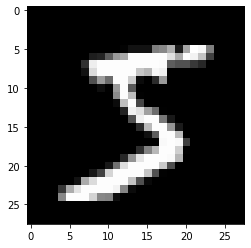

In [6]:
plt.imshow(X_train[0].reshape(28, 28))

In [11]:
mean_trainable_layers = []

def train(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray,
          optimizer: Optimizer, loss, epochs: int, batch_size: int):

    metric_names = ['loss', 'accuracy', 'f1_score']
    history = {phase_name: {metric_name: [] for metric_name in metric_names} for phase_name in ['train', 'test']}

    for i in range(epochs):
        for j in range(0, X_train.shape[0], batch_size):
            # print(f"epoch {i} batch {j}")
            X_b_train = X_train[j:j+batch_size]
            y_b_train = y_train[j:j+batch_size]
            y_pred = model.forward(X_b_train)
            loss_val = loss.forward(y_pred, y_b_train)
            loss_gradient = loss.backward()
            model.backward(loss_gradient)
            optimizer.step()

            y_pred_label = np.argmax(y_pred, axis=1)
            y_true_label = np.argmax(y_b_train, axis=1)

            history['train']['accuracy'].append(np.mean(y_pred_label == y_true_label))
            history['train']['loss'].append(loss_val)
            history['train']['f1_score'].append(f1_score(y_true_label, y_pred_label, average='macro'))

            wd = [
                np.mean([np.mean(layer.weights) for layer in model.trainable_layers]),
                np.max([np.max(layer.weights) for layer in model.trainable_layers]),
                np.mean([np.mean(layer.weights_gradient) for layer in model.trainable_layers]),
                np.max([np.max(layer.weights_gradient) for layer in model.trainable_layers])
            ]
            weights_data.append(wd)

            uniq_gradient_vals = list(set(abs(model.trainable_layers[0].weights_gradient.flatten())))
            mean_trainable_layers.append(np.mean(uniq_gradient_vals))

    return history

In [8]:
# train(model, X, y, optimizer, loss, 10, X.shape[-1])

In [20]:
model = Sequential([28*28, 10], [LinearActivation])
optimizer = GradientDescentOptimizer(model.trainable_layers, learning_rate = 0.001)
loss = CrossEntropyLoss()

batch_size = 1024
epochs = 10
weights_data = []

history = train(model, X_train, y_train, X_test, y_test, optimizer, loss, epochs, batch_size)

c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\SystemPoint\Documents\DNN_course_ITMO_2022\lab1\numpy_CNN\NumpyNN\NN_np.py:113: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(self.target * np.log(self.cliped_pred())) / batch_size
c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [21]:
history['train']['loss']

[6.423869072065145,
 -6.234467796915248,
 -15.765277709026297,
 -26.93966401858796,
 -34.77160844055208,
 -47.23241079122852,
 -58.445109375337196,
 -70.25707393259457,
 -76.73291025017429,
 -89.13991336142874,
 -96.07018313100515,
 -109.20474419472424,
 -117.62590255160897,
 -131.54538584383403,
 -139.2878634633716,
 -155.14262812922556,
 -157.62422796409865,
 -167.70675733912813,
 -179.98630583002526,
 -194.3505319027316,
 -203.2776828958419,
 -211.07682120271323,
 -223.73104199273314,
 -230.26686646792984,
 -243.73397567436467,
 -254.0517490506556,
 -270.26011510338014,
 -277.11753955600693,
 -293.05213350164604,
 -293.53927921503305,
 -304.15546718627917,
 -319.05437766501086,
 -332.31016161777814,
 -323.9613988365985,
 -351.2641580879987,
 -350.7248765615329,
 -366.327599990599,
 -381.61614379960156,
 -387.4298444333267,
 -399.51709034046894,
 -422.9266455374657,
 -426.24111770774516,
 -423.0057689279973,
 -431.2017039579603,
 -445.1706130771023,
 -453.979598067493,
 -479.22179989

In [15]:
mean_trainable_layers

[4366.107562646128,
 12859.983055479639,
 12592.670758319695,
 12421.85049833887,
 12759.896991054486,
 13545.133132034038,
 12715.905107451856,
 12014.039007092199,
 12776.862564380592,
 12773.171444023797,
 13577.492388596735,
 12965.941225165563,
 13092.771504660454,
 12966.841838097782,
 11890.196327302187,
 12532.673751035054,
 12181.747835497836,
 11817.909809264305,
 12585.73692722372,
 13237.274536165636,
 12659.871780970452,
 12915.775253216534,
 13447.727198697068,
 12493.955476645726,
 13220.856069042316,
 12031.74025604552,
 12878.794977924945,
 13293.620567375887,
 12785.805077805078,
 11685.2146985962,
 11608.769989047098,
 12598.042189586115,
 12354.657142857142,
 12808.510393873084,
 12689.464422550629,
 13205.581159022247,
 12729.506312113886,
 12301.748152203669,
 12626.368349619977,
 12713.224645583425,
 11780.17445993984,
 12989.553382233089,
 12700.332119854382,
 12121.039761969165,
 11947.896354733406,
 12562.540672451192,
 12912.963213416284,
 12946.013520822065,

In [16]:
np.abs(model.trainable_layers[0].weights_gradient.flatten()).mean()

3829.8936224489794

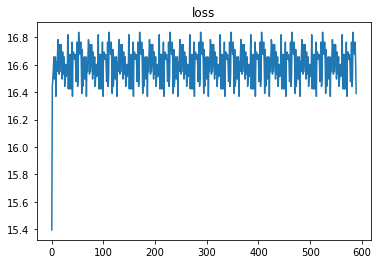

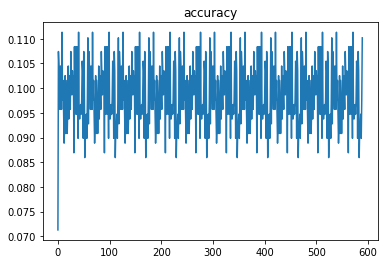

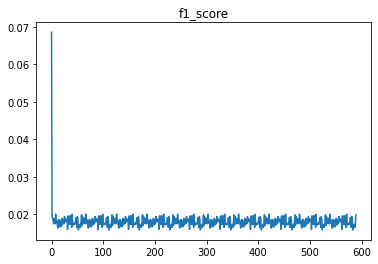

In [17]:
for key, value in history['train'].items():
    plt.plot(value)
    plt.title(key)
    plt.show()

In [14]:
a = model.forward(X_train[0])
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [15]:
"""
def train(model, X: np.ndarray, y: np.ndarray, optimizer: Optimizer, loss, epochs: int, batch_size: int = 32, verbose: bool = True):
    for epoch in range(epochs):
        for X_batch, y_batch in get_batches(X, y, batch_size):
            y_pred = model.forward(X_batch)
            loss_gradient = loss.gradient(y_batch, y_pred)
            model.backward(loss_gradient)
            optimizer.step()
        if verbose:
            print(f"Epoch {epoch + 1}/{epochs} loss: {loss(y_batch, y_pred)}")
"""

'\ndef train(model, X: np.ndarray, y: np.ndarray, optimizer: Optimizer, loss, epochs: int, batch_size: int = 32, verbose: bool = True):\n    for epoch in range(epochs):\n        for X_batch, y_batch in get_batches(X, y, batch_size):\n            y_pred = model.forward(X_batch)\n            loss_gradient = loss.gradient(y_batch, y_pred)\n            model.backward(loss_gradient)\n            optimizer.step()\n        if verbose:\n            print(f"Epoch {epoch + 1}/{epochs} loss: {loss(y_batch, y_pred)}")\n'

In [23]:
import torch

c:\Users\SystemPoint\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:


X_train_torch = torch.from_numpy(X_train).float()
y_train_torch = torch.from_numpy(y_train)

X_test_torch = torch.from_numpy(X_test).float()
y_test_torch = torch.from_numpy(y_test)

def train_torch(model, X_train: torch.Tensor, y_train: torch.Tensor, X_test: torch.Tensor, y_test: torch.Tensor,
          optimizer, loss, epochs: int, batch_size: int):
    
    metric_names = ['loss', 'accuracy', 'f1_score']
    history = {phase_name: {metric_name: [] for metric_name in metric_names} for phase_name in ['train', 'test']}

    for i in range(epochs):
        for j in range(0, X_train.shape[0], batch_size):
            # print(f"epoch {i} batch {j}")
            X_b_train = X_train[j:j+batch_size]
            y_b_train = y_train[j:j+batch_size]
            y_pred = model(X_b_train)
            loss_val = loss(y_pred, y_b_train)
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            y_pred_label = np.argmax(y_pred.detach().numpy(), axis=1)
            y_true_label = np.argmax(y_b_train.detach().numpy(), axis=1)

            history['train']['accuracy'].append(np.mean(y_pred_label == y_true_label).item())
            history['train']['loss'].append(loss_val.item())
            history['train']['f1_score'].append(f1_score(y_true_label, y_pred_label, average='macro').item())

    return history

In [25]:
X_train_torch.dtype

torch.float32

In [26]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(28*28, 10),
    torch.nn.Softmax(dim = 1)
)

weights_data_torch = []

optimizer_torch = torch.optim.Adam(model_torch.parameters(), lr=1e-3)

loss_torch = torch.nn.CrossEntropyLoss()

history_torch = train_torch(model_torch, X_train_torch, y_train_torch, X_test_torch, y_test_torch, optimizer_torch, loss_torch, 10, 4096)

In [21]:
# list(model_torch.parameters())

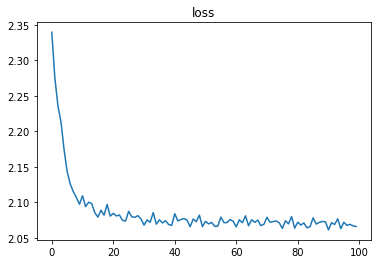

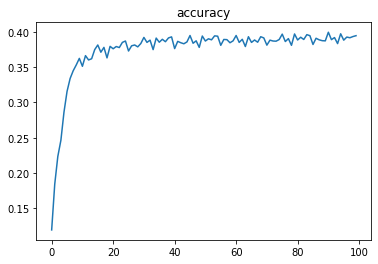

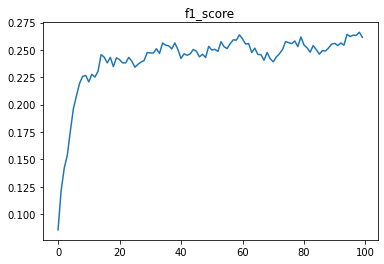

In [27]:
for key, value in history_torch['train'].items():
    plt.plot(value[:100])
    plt.title(key)
    plt.show()

In [23]:
history_torch['train']['loss'][0]

2.3664378443791065